# Проверка гипотез для увеличения выручки интернет-магазина

[Описание проекта](#0)

[1 Импортируем библиотеки и файлы](#1)

[2 Подготовка данных](#2)

[3 Приоритизация гипотез](#3)

[4 Анализ A/B-теста](#4)

[5 Общий вывод](#5)

**Описание данных**

**Данные для первой части**
Файл `/datasets/hypothesis.csv`
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение `Efforts`, тем дороже проверка гипотезы.

**Данные для второй части**
Файл `/datasets/orders.csv`
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`
`date` — дата;
`group` — группа A/B-теста;
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

<a name="0"></a>
**Описание проекта**

**Контекст**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Часть 1. Приоритизация гипотез.**
В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

**Задача**

* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста**
Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

**Задача**

Проанализируйте A/B-тест:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.


## Импортируем библиотеки и файлы
<a name="1"></a>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
cm = sns.light_palette("green", as_cmap=True)

import datetime
import math as mt
from scipy import stats as st
import scipy.stats as stats
from scipy.stats import mannwhitneyu

#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
visitors = pd.read_csv('\datasets\visitors.csv')
orders = pd.read_csv('\datasets\orders.csv')
hypothesis = pd.read_csv('\datasets\hypothesis.csv')

### Изучение данных
<a name="1.1"></a>

In [3]:
list_df = (visitors, orders, hypothesis)
for list_df in list_df:
    display('______________info_____________________')
    display(list_df.info())
    display('______________describe_________________')
    display(list_df.describe())
    display('______________head_____________________')
    display(list_df.head(10))
    display('______________tail_____________________')
    display(list_df.tail(10))
    display('_____________isna______________________')
    display(list_df.isna().sum())
    display('_____________duplicated________________')
    display(list_df.duplicated().sum())

'______________info_____________________'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

'______________describe_________________'

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


'______________head_____________________'

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


'______________tail_____________________'

,date,group,visitors
52,2019-08-22,B,650
53,2019-08-23,B,546
54,2019-08-24,B,378
55,2019-08-25,B,679
56,2019-08-26,B,676
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


'_____________isna______________________'

date        0
group       0
visitors    0
dtype: int64

'_____________duplicated________________'

0

'______________info_____________________'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

'______________describe_________________'

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


'______________head_____________________'

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


'______________tail_____________________'

,transactionId,visitorId,date,revenue,group
1187,2274188238,132143192,2019-08-14,750,A
1188,1692103379,1022829655,2019-08-14,112,A
1189,4082620617,393266494,2019-08-14,31550,B
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


'_____________isna______________________'

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

'_____________duplicated________________'

0

'______________info_____________________'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

'______________describe_________________'

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


'______________head_____________________'

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


'______________tail_____________________'

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


'_____________isna______________________'

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

'_____________duplicated________________'

0

Определим количество пользователей оказавшихся в двух группах одновременно:

In [4]:
double_users = orders.groupby('visitorId').agg({'group':'nunique'}).reset_index()
double_users = double_users[double_users.group > 1]#.count().to_frame()

double_users.head()

,visitorId,group
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2


In [5]:
double_users_cnt = double_users[double_users.group > 1].count().to_frame()
double_users_cnt

,0
visitorId,58
group,58


<a name="1.2"></a>
**Вывод:** 
* данные содержатся в трех таблицах, дублей и пропусков нет.
* в `orders` 58 пользователей задублированны в двух группах одновременною
* в первой таблице `visitors.csv` содержится информация о количестве визитов групп по дате.
* во второй таблице `orders` содержится информация о транзакциях, ID пользователей, дате и количестве покупок в разбивке по группм. 
* в третьей таблице `hypothesis` содержится информация по условию проверяемых гипотез.

<a name="2"></a>
## Подготовка данных

Избавимся от дублей в `orders`:

In [6]:
orders = orders.loc[~(orders['visitorId'].isin(double_users['visitorId']))]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1016 non-null   int64 
 1   visitorId      1016 non-null   int64 
 2   date           1016 non-null   object
 3   revenue        1016 non-null   int64 
 4   group          1016 non-null   object
dtypes: int64(3), object(2)
memory usage: 47.6+ KB


Преобразуем тип данных в `visitors`:

In [7]:
visitors['date']=visitors['date'].astype('Datetime64')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Преобразуем тип данных в `orders`:

In [8]:
orders['date']=orders['date'].astype('Datetime64')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Приведем названия столбцов в `hypothesis` к нижнему регистру:

In [9]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Приведем названия столбцов в `orders` к нижнему регистру:

In [10]:
orders.columns = orders.columns.str.lower()
orders.columns

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')

<a name="3"></a>
## Приоритизация гипотез

### Расчитаем фреймворк ICE для приоритизации гипотез

In [11]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(0)
hypothesis.sort_values(by='ICE', ascending=False).style.background_gradient(cmap=cm)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.000000


### Расчитаем фреймворк RICE для приоритизации гипотез

In [12]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values(by='RICE', ascending=False).style.background_gradient(cmap=cm)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.000000,112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.000000,40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.000000,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.000000,9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.000000,4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.000000


### Изучим, как изменилась приоритизация гипотез при применении RICE вместо ICE

Вывод:

Приорететные гипотезы по ICE:
* Запустить акцию, дающую скидку на товар в день рождения.
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
* Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

Приорететные гипотезы по RICE:
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
* Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

* По фреймворкам максимальные приорететы у гипотез:
    - `Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей`
    - `Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа`
    - `Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию`
    - `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`
    - `Запустить акцию, дающую скидку на товар в день рождения`

* Гипотеза `Запустить акцию, дающую скидку на товар в день рождения` опустилась на 5 место, т.к. RICE работет по охвату, а день рождения "только раз в году"
* Гипотезы `Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа` и `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок` поднялись в топ по причине хорошего охвата пользователей
    
    


## Анализ A/B-теста
<a name="4"></a>

Создаем массив уникальных пар значений дат и групп теста 

In [13]:
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Агрегируем значения. Вычислим максимальную дату:

In [14]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date': 'max', 'group': 'max', 'transactionid': pd.Series.nunique, 'visitorid': pd.Series.nunique, 'revenue': 'sum'}), axis=1)\
    .sort_values(by=['date','group']) 
ordersAggregated.head()

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Получим агрегированные кумулятивные по дням данные о посетителях:

In [15]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), axis=1)\
    .sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

In [16]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

In [17]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

Создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B

In [18]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

### Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

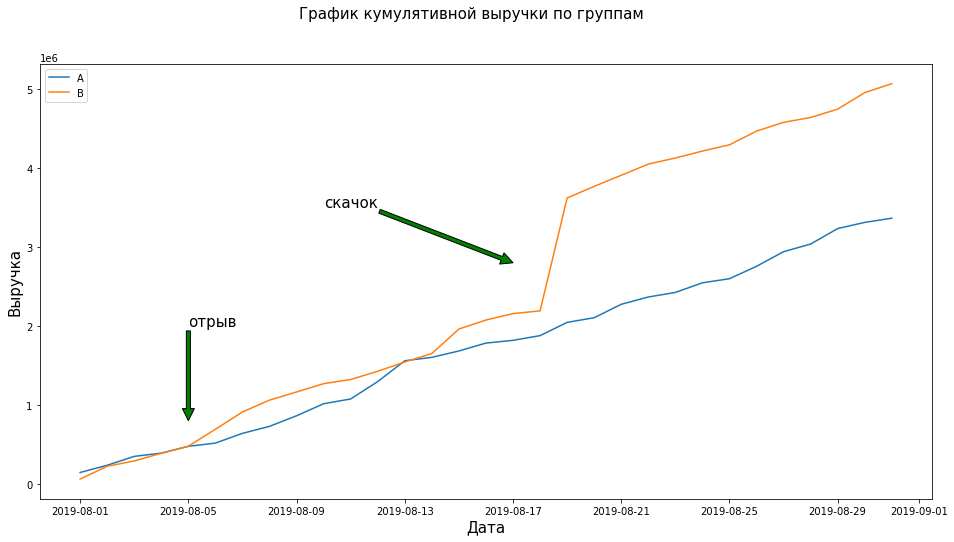

In [19]:
plt.figure(figsize = (16, 8))
# Строим график выручки группы А 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.suptitle('График кумулятивной выручки по группам', fontsize=15)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Выручка', fontsize=15)
#plt.grid()

plt.annotate('скачок', fontsize=15, xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', fontsize=15, xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g'))

plt.legend()
plt.show()


Кумулятивная выручка увеличивается в течение всего периода.
В группе B идим резкий скачок выручки 19 августа 2019 г. Это означпет реский рост числа заказов, или о появлении очень дорогих заказов в выборке. 

### Построим графики среднего чека по группам:

Разделим кумулятивную выручку на кумулятивное число заказов:

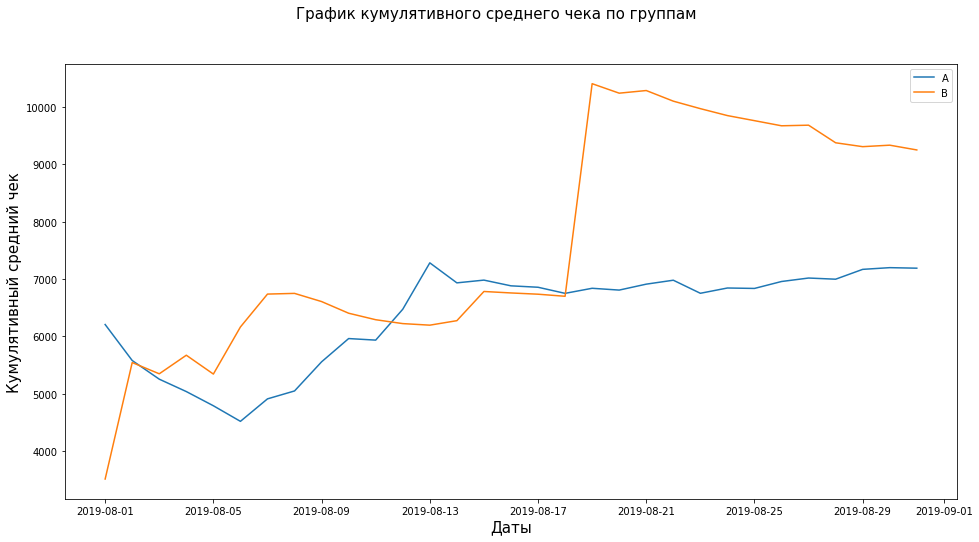

In [20]:
plt.figure(figsize = (16, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')
plt.suptitle('График кумулятивного среднего чека по группам', fontsize=15)
plt.xlabel('Даты', fontsize=15)
plt.ylabel('Кумулятивный средний чек', fontsize=15)
#plt.grid()
plt.legend()
plt.show()


Средний кумулятивный чек в группе B показывает резкий скачок 19 августа 2019 г., после чего наблюдается постепенное снижение среднего чека. 

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

Собираем данные в одном датафрейме:

In [21]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


Cтроим отношение средних чеков:

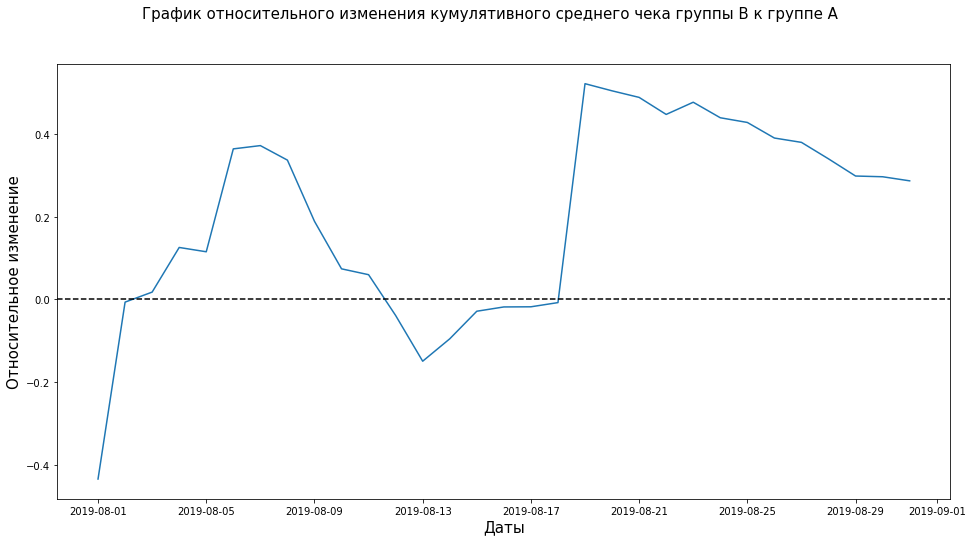

In [22]:
plt.figure(figsize = (16, 8))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.suptitle('График относительного изменения кумулятивного среднего чека группы В к группе А', fontsize=15)
plt.xlabel('Даты', fontsize=15)
plt.ylabel('Относительное изменение', fontsize=15)
#plt.grid()
plt.show()


График очень неравномерен, значит есть выбросы и/или крупные/малые заказы. 

### Построим график кумулятивной конверсии по группам

Считаем кумулятивную конверсию:

In [23]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,A,66,60,346854,1845,0.035772


Отделяем данные по группе A:

In [24]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataA.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
2,2019-08-02,A,42,36,234381,1338,0.031390
4,2019-08-03,A,66,60,346854,1845,0.035772
6,2019-08-04,A,77,71,388030,2562,0.030055
8,2019-08-05,A,99,92,474413,3318,0.029837


Отделяем данные по группе B:

In [25]:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
cumulativeDataB.head()

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,17,17,59758,713,0.023843
3,2019-08-02,B,40,39,221801,1294,0.030912
5,2019-08-03,B,54,53,288850,1803,0.029950
7,2019-08-04,B,68,66,385740,2573,0.026428
9,2019-08-05,B,89,87,475648,3280,0.027134


Строим график кумулятивной конверсии по группам

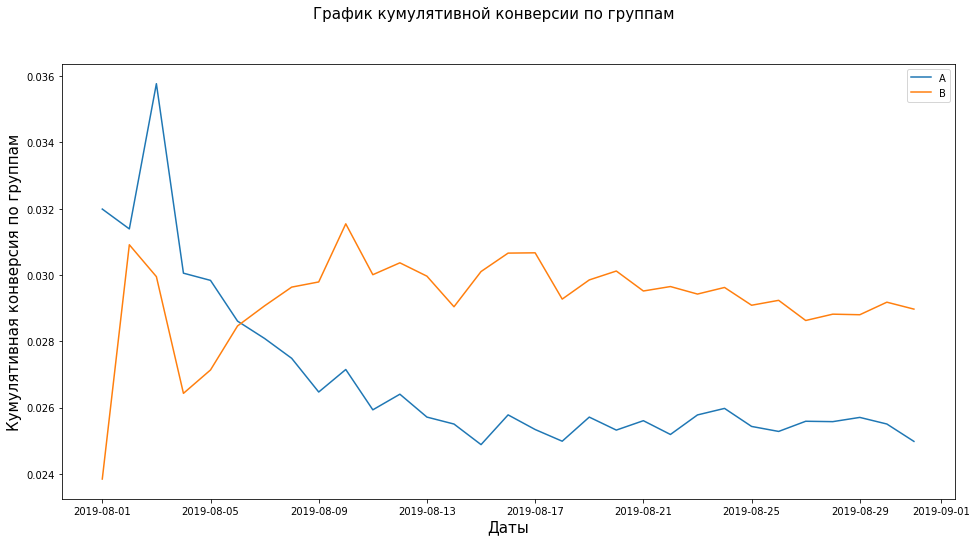

In [26]:
plt.figure(figsize = (16, 8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.suptitle('График кумулятивной конверсии по группам', fontsize=15)
plt.xlabel('Даты', fontsize=15)
plt.ylabel('Кумулятивная конверсия по группам', fontsize=15)
#plt.grid()
plt.legend()
plt.show()

В обеих группах до 4 августа наблюдаются резкие возрастания куммулятивной конверсии 

Кумулятивная конверсия группы `A` резко возрастает в период с 4 августа по 11 августа, далее демонстрирует устойчивое состояние до 21 августа. Плавное снижение начинается с  до 21 августа по 27 авгута, затем начинает плавное возрастание.

Кумулятивная конверсия группы `B` резко снижается с 4 августа по 11 августа, далее показывает малый устойчивый рост с 11 августа по 23 августа, после происходит планое снижение показателя.


### Построим график относительного изменения кумулятивной конверсии группы B к группе A

Создадим датафрейм с кумулятивным значение конверсии групп A и B:

In [27]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


Отобразим график:

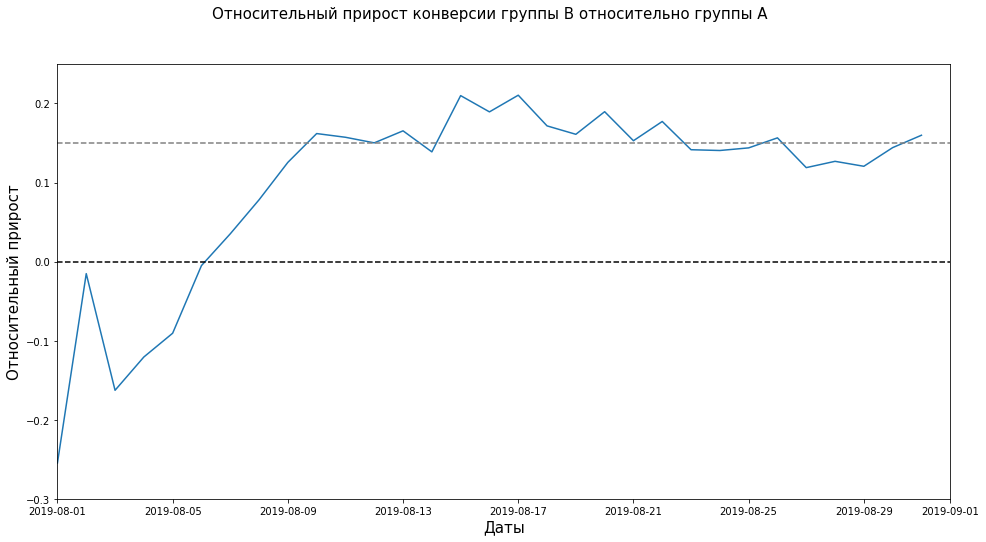

In [28]:
plt.figure(figsize = (16, 8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0.0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

plt.axis(['2019-08-01', '2019-09-01', -0.30, 0.25]) 

plt.suptitle('Относительный прирост конверсии группы B относительно группы A', fontsize=15)
plt.xlabel('Даты', fontsize=15)
plt.ylabel('Относительный прирост', fontsize=15)
#plt.grid()
plt.show()

Стабильный рост конверсии группы B началься с 5 августа по 9 августа. 
В период с 10 августа по 19 августа относительный прирост конверсии изменяется в пределах от 0.15 до 0.21.
Снижение относительного прироста конверсии начинается с 20 по 25 августа.



### Построим точечный график количества заказов по пользователям

Подсчитаем количество заказов по пользователям и посмотрим на результат

In [29]:
#data['date'] = data['date'].map(lambdax: dt.datetime.strptime(x, '%d/%m/%Y'))

ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique}))
ordersByUsers.columns = ['user_id', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Построим гистрограмму распределения количества заказов на одного пользователя:

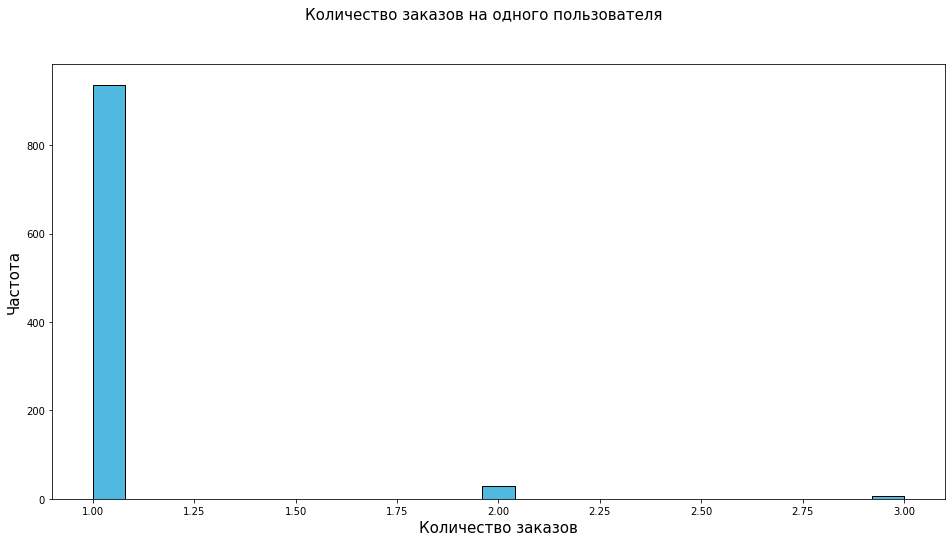

In [30]:
plt.figure(figsize = (16, 8))
plt.hist(ordersByUsers['orders'], bins = 25, facecolor='#4FB9E0', ec='black')
plt.suptitle('Количество заказов на одного пользователя', fontsize=15)
plt.xlabel('Количество заказов', fontsize=15)
plt.ylabel('Частота', fontsize=15)
#plt.grid()
plt.show()

Отобразим в % соотношении:

In [31]:
ordersByUsers_pct = (ordersByUsers.groupby("orders").agg({"orders":"count"}).apply(lambda x:100 * x/x.sum())).round(2)
ordersByUsers_pct.columns = ['% по заказам']
ordersByUsers_pct.sort_values('% по заказам', ascending=False)

,% по заказам
orders,
1,96.30
2,2.98
3,0.72


Построим точечную диаграмму числа заказов на одного пользователя:

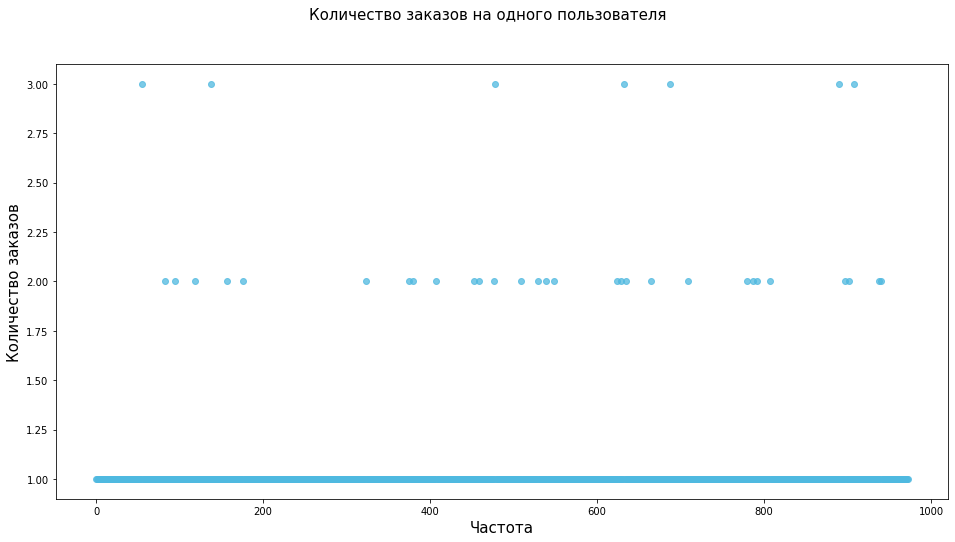

In [32]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize = (16, 8))
plt.scatter(x_values, ordersByUsers['orders'], c='#4FB9E0', alpha=0.75)
plt.suptitle('Количество заказов на одного пользователя', fontsize=15)
plt.ylabel('Количество заказов', fontsize=15)
plt.xlabel('Частота', fontsize=15)
plt.show()

Почти 91% пользователей совершили только 1 заказ. Перспективная группа - пользователи совершившие 2 и 3 заказа.

### Определим 95-й и 99-й перцентили количества заказов на пользователя

In [33]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

5% пользователей совершили по 1 заказу.
1% пользователей совершил не более 2 заказов 

### Построим точечный график стоимостей заказов

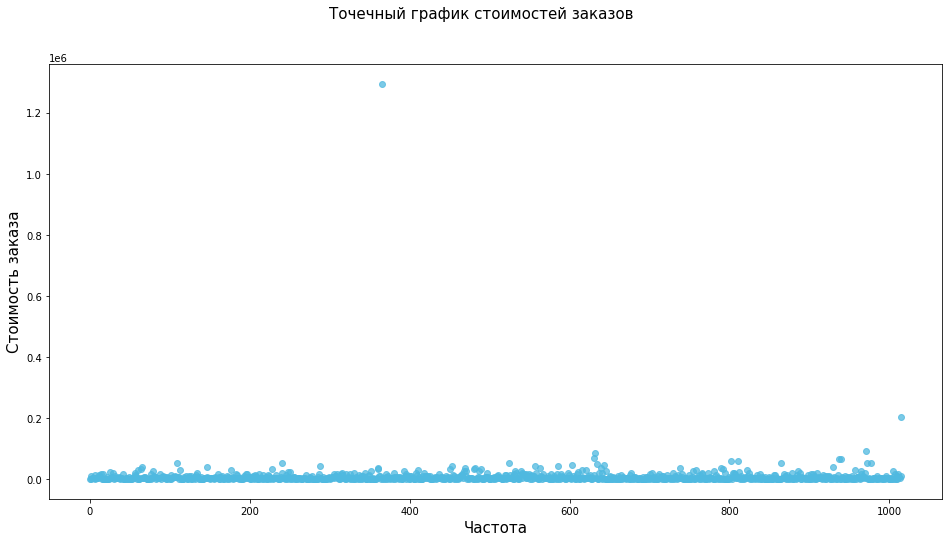

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize = (16, 8))
plt.scatter(x_values, orders['revenue'], c='#4FB9E0', alpha=0.75)
plt.suptitle('Точечный график стоимостей заказов', fontsize=15)
plt.ylabel('Стоимость заказа', fontsize=15)
plt.xlabel('Частота', fontsize=15)
plt.show()

Из графика видим 2 выброса.

Построим диаграмму размаха:

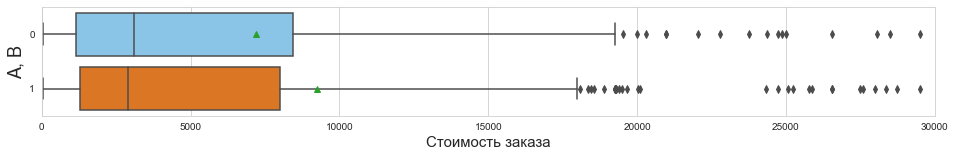

In [35]:
data1 = orders[orders['group'] == 'A']['revenue']
data2 = orders[orders['group'] == 'B']['revenue']

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(16, 2))
sns.boxplot( 
    data=[data1, data2], orient='h',
    palette=[sns.xkcd_rgb["lightblue"], sns.xkcd_rgb["orange"]], 
    showmeans=True)

plt.xlim(0, 30000) #предел величины по х

plt.ylabel("A, B", size = 18)
plt.xlabel("Стоимость заказа", size = 15);

90% пользователей совершают заказы на сумму не более 18000 р.

### Определим 95-й и 99-й перцентили стоимости заказов

In [36]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Всего 5% пользователей совершили покупки от 26785 р.
1% пользователей совершили покупки от 58233 р.
Аномальными значениями будут покупки от 26785 р.

### Определим статистическую значимость различий в конверсии между группами по «сырым» данным

Определим количество посетителей группы `A` по дням:

In [37]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


Определим кумулятивное количество посетителей группы `A` по дням:

In [38]:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                            .agg({'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


Определим количество посетителей группы `B` по дням:

In [39]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBDaily.head()

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


Определим кумулятивное количество посетителей группы `B` по дням:

In [40]:
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                            .agg({'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


Определим по дням количество и сумму заказов группы `A`:

In [41]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,23,142779
1,2019-08-02,19,91602
2,2019-08-03,24,112473
3,2019-08-04,11,41176
4,2019-08-05,22,86383


Определим по дням кумулятивное количество и сумму заказов группы `A`:

In [42]:
ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]
    .agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1)\
    .sort_values(by=['date'])
ordersACummulative.columns = ['date','ordersCummulativeA','revenueCummulativeA']
ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413


Определим по дням количество и сумму заказов группы `B`:

In [43]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,17,59758
1,2019-08-02,23,162043
2,2019-08-03,14,67049
3,2019-08-04,14,96890
4,2019-08-05,21,89908


Определим по дням кумулятивное количество и сумму заказов группы `B`:

In [44]:
ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
    .agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis=1)\
    .sort_values(by=['date'])
ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB']
ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850
3,2019-08-04,68,385740
4,2019-08-05,89,475648


Объединим полученныйдатафреймы в один:

In [45]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


data.head(10)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280
5,2019-08-06,15,40919,23,214842,114,515332,112,690490,667,655,3985,3935
6,2019-08-07,16,123248,23,219164,130,638580,135,909654,644,709,4629,4644
7,2019-08-08,14,88639,22,150141,144,727219,157,1059795,610,654,5239,5298
8,2019-08-09,11,134237,19,103166,155,861456,176,1162961,617,610,5856,5908
9,2019-08-10,15,152275,22,105162,170,1013731,198,1268123,406,369,6262,6277


Посчитаем статистическую значимость различия в конверсии между группами.

Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `visitorid`, `orders`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

In [46]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders'] 


Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [47]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']
                                    .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']
                                    .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

Применим критерий и отформатируем `p-value`, округлив его до трёх знаков после запятой.

`Н0` - Статистически значимых различий в среднем чеке заказа нет.
`Н1` - Статистически значимые различия в среднем чеке заказа есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов

In [48]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))

p-value: 0.011


Вывод: 
* p-value меньше 0.05. Значит, отвергаем нулевую гипотезу, т.е. статистически значиме различия в конверсии между группами A и B есть

Выведем относительный прирост конверсии группы B: `конверсия группы B / конверсия группы A - 1`:

In [49]:
print("Относительный прирост B к A: {0:.2%}".format(sampleB.mean() / sampleA.mean() - 1))

Относительный прирост B к A: 15.98%


Вывод:
* Относительный прирост B к A равен 15.98 %

### Определим статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Применим критерий и отформатируем `p-value`, округлив его до трёх знаков после запятой.

`Н0` - Статистически значимых различий в среднем чеке заказа нет.
`Н1` - Статистически значимые различия в среднем чеке заказа есть.


In [50]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative='two-sided')[1]))

print('Относительный прирост B к A: {0:.2%}'.format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()-1)) 


p-value: 0.829
Относительный прирост B к A: 28.66%


Вывод:
* p-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.
* Относительный прирост B к A: 28.66% 

 ### Определим статистическую значимость различий в конверсии между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 26 785 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.

Сделаем срезы пользователей с числом заказов больше 4 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 26 785 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`.

In [51]:
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorid'],
    ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorid'],],axis=0)

usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())

In [52]:
abnormalUsers.head().to_frame()

,visitorid
568,113298937
1099,148427295
928,204675465
684,358944393
648,382846391


In [53]:
print('Количество аномальных пользователей:', abnormalUsers.shape)

Количество аномальных пользователей: (51,)


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [54]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'], 
    pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders',),],axis=0,)


sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'], 
    pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders',),],axis=0,) 


Применим критерий и отформатируем `p-value`, округлив его до трёх знаков после запятой.

`Н0` - Статистически значимых различий в среднем чеке заказа нет.
`Н1` - Статистически значимые различия в среднем чеке заказа есть.

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [55]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]))

p-value: 0.017


Выведем относительный прирост конверсии группы B

In [56]:
print('Относительный прирост B к A: {0:.2%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Относительный прирост B к A: 15.56%


Вывод:
* p-value меньше 0.05. Значит, отвергаем нулевую гипотезу, т.е. статистически значиме различия в конверсии между группами A и B есть

* Результаты конверсии (по очищенным данным) практически не изменились в сравнении с конверсией по очищенным данным

### Определим статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

H0: статистически значимых различий в среднем чеке между группами нет.
H1: статистически значимые различий в среднем чеке между группами есть.

In [57]:

print('p-value: {0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorid']
    .isin(abnormalUsers)),)]['revenue'], orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorid']
    .isin(abnormalUsers)),)]['revenue'], alternative='two-sided')[1]))

print("Относительный прирост B к A: {0:.2%}".format(orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorid']
    .isin(abnormalUsers)),)]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorid']
    .isin(abnormalUsers)),)]['revenue'].mean() - 1)) 


p-value: 0.741
Относительный прирост B к A: -5.29%


Вывод:
* p-value возрос, что подтверждает вывод о отсутствии статистически значимых различий в среднем чеке заказа между группами.
* Относительный прирост в среднем чеке заказа группы B к среднему чеку заказа группы A уменьшился на 5.29%

## Общий вывод
<a name="5"></a>

* часть пользователей попали в обе группы, что не допустимо
* топ-гипотезы во фреймворках `ICE` и `RICE` одинаковы:
    - `Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей`
    - `Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа`
    - `Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию`
    - `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`
    - `Запустить акцию, дающую скидку на товар в день рождения`
* кумулятивная выручка по группам возрастает весь временной диапазон, в группе `B` 19 августа есть резкое возрастание, возможно из-за дорогих заказов
* куммулятивная выручка по группе `В` немного превышает кумулятивную выручку группы `A`
* кумулятивный средний чек  возрастает весь временной диапазон, в группе `B` 19 августа есть резкий скачок, подтверждающий именно дорогую покупку, а не рост числа заказов
* конверсиия группе `B` больше, но к концу временного периода наблюдается снижение 
* статистически значиме различия в конверсии между группами `A` и `B` есть
* результаты конверсии (по очищенным данным) практически не изменились в сравнении с конверсией по очищенным данным
* различий в среднем чеке между группами `A` и `B` нет.
* после очистки данных относительный прирост среднего чека группы `B` к группе `A` резко сократился, что подтверждает наличие нескольких крупных заказов
* по "очищенным данным", относительно группы `A`, средний чек группы `B` уменьшился на 5.29%, но конверсия больше на 15.56%, что делает группу `B` более перспективной.

**ИТОГ:**
**Остановить тест, зафиксировать победу группы `B`**